# EJERCICIOS

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#import tensorflow_hub as hub
from keras.utils import to_categorical

2025-01-16 20:05:17.543499: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-16 20:05:17.550435: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-16 20:05:17.558571: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-16 20:05:17.560995: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-16 20:05:17.567758: I tensorflow/core/platform/cpu_feature_guar

In [2]:
print("Dispositivos disponibles:")
for device in tf.config.list_physical_devices():
    print(device)

Dispositivos disponibles:
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


I0000 00:00:1737047413.738917   19437 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737047413.765868   19437 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737047413.766072   19437 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


## EJERCICIO 1

Crea tu propia CNN desde el principio e intenta conseguir la mayor exactitud posible con MNIST (por ejemplo 99% en el conjunto de prueba).

En vez de crear un conjunto de validación en el fit indica que porcentaje (10%) vas a usar para el conjunto de validación (validation_split)

Por ejemplo:
* 2 capas convolucionales (32 filtros)
* 1 capa maxpool
* 2 capas convolucionales (64 filtros)
* 1 capa maxpool
* 1 capa flatten
* 1 capa dropout
* 1 capa densa oculta
* 1 capa dropout
* 1 capa densa de salida

Usá como función de pérdida categorical_crossentropy.

Ten en cuenta que:
* sparse_categorical_crossentropy: se usa cuando las etiquetas de las clases están representadas como enteros (codificación entera), por ejemplo: 0, 1, 2, 3, ... para n clasess
* categorical_crossentropy: se usa cuando las etiquetas están representadas en formato one-hot encoded.

Tal y com tenemos los datos podemos usar directamente sparse_categorical_crossentropy, para poder aplicar categorical_crossentropy hay que hacer una transformación en y (to_categorical).

Haz una predicción y muestra la imagen con la etiqueta real y la predicha.

In [3]:
from functools import partial
# Cargar los datos MNIST

(data_train, data_test) = tf.keras.datasets.mnist.load_data()

# Dividir los datos en imágenes y etiquetas
(x_train, y_train) = data_train
(x_test, y_test) = data_test

# Normalizar las imágenes a [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Agregar la dimensión del canal de color
x_train = x_train.reshape(-1, 28, 28, 1)  # (batch_size, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [8]:
# Construir el modelo
tf.random.set_seed(42)
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal")
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    DefaultConv2D(filters=32),
    DefaultConv2D(filters=32),
    tf.keras.layers.MaxPooling2D(),
    DefaultConv2D(filters=64),
    DefaultConv2D(filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
import random
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=25, validation_split=0.1)

Epoch 1/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8624 - loss: 0.4279 - val_accuracy: 0.9863 - val_loss: 0.0433
Epoch 2/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9744 - loss: 0.0878 - val_accuracy: 0.9910 - val_loss: 0.0327
Epoch 3/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9802 - loss: 0.0678 - val_accuracy: 0.9888 - val_loss: 0.0371
Epoch 4/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9834 - loss: 0.0571 - val_accuracy: 0.9910 - val_loss: 0.0305
Epoch 5/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9845 - loss: 0.0505 - val_accuracy: 0.9918 - val_loss: 0.0294
Epoch 6/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9871 - loss: 0.0451 - val_accuracy: 0.9937 - val_loss: 0.0284
Epoch 7/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1000us/step - accuracy: 0.9886 - loss: 0.0386 - val_accuracy: 0.9917 - val_loss: 0.0311
Epoch 8/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9883 - loss: 0.0373

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Etiqueta real: 8
Etiqueta predecida: 8


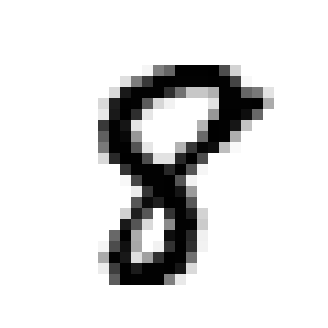

In [44]:
i = random.randint(1,len(x_test))
plt.figure(figsize=(4, 4))
plt.imshow(x_test[i],cmap='gray_r')
plt.axis("off")
pred = model.predict(x_test[i].reshape(1, 28, 28, 1))
print(f"Etiqueta real: {y_test[i]}")
print(f"Etiqueta predecida: {np.argmax(pred)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━

(-0.5, 27.5, 27.5, -0.5)

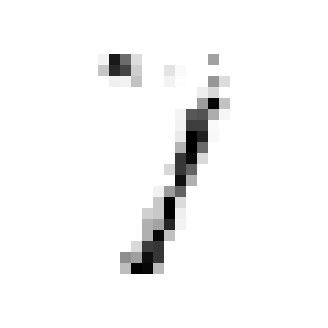

In [46]:
# Predicciones hasta fallar
real = 0
predict = 0
tries = 0
while real == predict:
    tries += 1
    i = random.randint(1,len(x_test))
    real = y_test[i]
    model.predict(x_test[i].reshape(1, 28, 28, 1))
    pred = model.predict(x_test[i].reshape(1, 28, 28, 1))
    predict = np.argmax(pred)

print(f"Fallo con muestra {i}, etiqueta real {real} y predicción {predict}. {tries} de intentos")
plt.figure(figsize=(4, 4))
plt.imshow(x_test[i],cmap='gray_r')
plt.axis("off")

## EJERCICIO 2

Haz unas fotos con tu movil (a objetos) y usando alguno de los modelos que existen (por ejemplo ResNet101V2). Tendrás de adecuar el tamaño de las fotos antes de intentar predecir que es lo que has fotografiado.

Tendrás que investigar como añadir cargar tus images, un buen sitio por donde empezar es por la documentación de Keras para ResNEt101V2.

In [49]:
resnet = tf.keras.applications.ResNet101V2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    name="resnet101v2",
)

In [54]:
import requests

# URL para descargar las clases de ImageNet
url = "https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json"
response = requests.get(url)
class_idx = response.json()

# Mostrar algunas de las clases
for i in range(10):  # Imprimir las primeras 10 clases
    print(class_idx[str(i)][1])  # El segundo elemento es el nombre de la clase


brambling
goldfinch
house_finch
junco
indigo_bunting
robin
bulbul
jay
magpie
chickadee


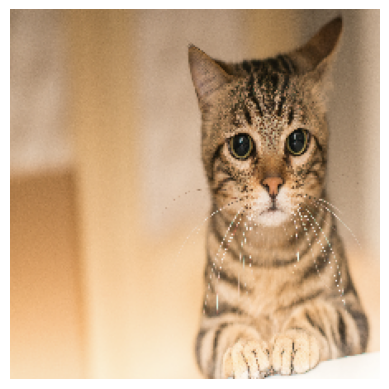

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted: [('n02123045', 'tabby', 0.6570553), ('n02123159', 'tiger_cat', 0.33819276), ('n02124075', 'Egyptian_cat', 0.0047377665)]


In [ ]:
resnetv2 = tf.keras.applications.ResNet101V2(weights='imagenet')
img_path = 'datos/gato.png' # Un gato aleatorio de Google
img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.resnet_v2.preprocess_input(x)

preds = resnetv2.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', tf.keras.applications.resnet50.decode_predictions(preds, top=3)[0])

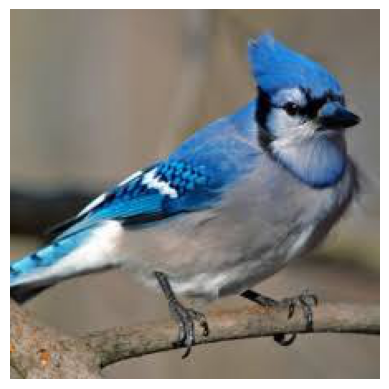

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted: [('n01580077', 'jay', 0.9999945), ('n01537544', 'indigo_bunting', 4.1692388e-06), ('n02268853', 'damselfly', 1.3967377e-07)]


In [ ]:
img_path = 'datos/jay.jpeg' # Una de las fotos de imagenet
img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.resnet_v2.preprocess_input(x)

preds = resnetv2.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', tf.keras.applications.resnet50.decode_predictions(preds, top=3)[0])

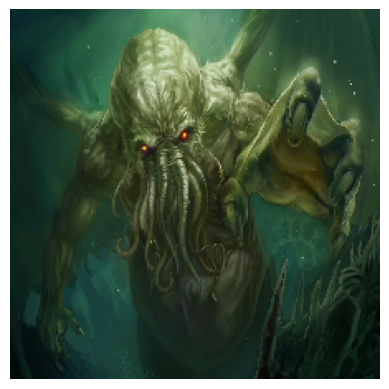

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted: [('n01968897', 'chambered_nautilus', 0.15734428), ('n09229709', 'bubble', 0.10988517), ('n03916031', 'perfume', 0.101706594)]


In [65]:
img_path = 'datos/cthulhu.jpg' # Una clase que no esta entre las 1000
img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.resnet_v2.preprocess_input(x)

preds = resnetv2.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', tf.keras.applications.resnet50.decode_predictions(preds, top=3)[0])

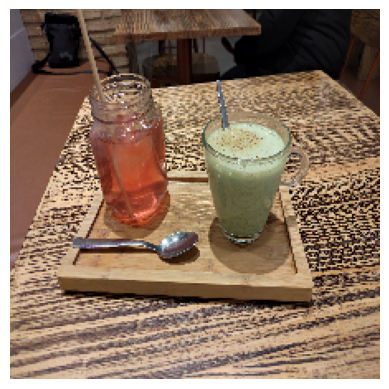

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted: [('n02823750', 'beer_glass', 0.8854888), ('n04476259', 'tray', 0.069080055), ('n03062245', 'cocktail_shaker', 0.010627618)]


In [66]:
img_path = 'datos/mi_te.jpg' # Una foto de mi móvil
img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.resnet_v2.preprocess_input(x)

preds = resnetv2.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', tf.keras.applications.resnet50.decode_predictions(preds, top=3)[0])

## EJERCICIO 3

El dataset food101 es un conjunto de datos consta de 101 categorías de alimentos, con 101000 imágenes. Para cada clase, se proporcionan 250 imágenes de prueba revisadas manualmente, así como 750 imágenes de entrenamiento. A propósito, las imágenes de entrenamiento no se limpiaron y, por lo tanto, aún contienen cierta cantidad de ruido. Esto viene principalmente en forma de colores intensos y, a veces, etiquetas incorrectas. Todas las imágenes se redimensionaron para tener una longitud lateral máxima de 512 píxeles.
* Carga el conjunto de imagenes: entrenamiento, validación (coge la mitad de los datos de prueba) y prueba (coge la otra mitad de los datos de prueba)
* Explora los datos: dimensiones, número de elementos, dibuja algunas imagenes con sus etiquetas...
* Prepara los datos: añade más elementos al conjunto de entrenamiento (rotando, trasladando... las imagenes acutales), cambia el tamaño para que sea adecuado para el modelo, normaliza...
* Entrena un modelo para estos datos usando algunas de las redes ya existentes (por ejemplo: MobileNetV2): coge todo menos la última capa y añade una capa globalaveragepooling y la capa dense de salida. En este caso utiliza como función de pérdida sparse_categorical_crossentropy
* Busca una imagen de comida en Internet y haz una predicción

Por defecto tensorflow busca y descarga los dato en:
* Linux/Mac: ~/tensorflow_datasets/
* Windows: C:\Users\<usuario>\tensorflow_datasets\

Los datos puedes copiarlo de mi disco duro o descarlos, pero son 5.12GB

In [3]:
# Cargar el conjunto de datos Food101 desde TFDS
dataset, info = tfds.load('food101', with_info=True, as_supervised=True)

# Inspeccionar información sobre el conjunto de datos
print(info)

# Cargar las particiones de entrenamiento y validación
train_dataset = dataset['train']
validation_dataset = dataset['validation']

# Dividir la partición de validación en 50% para validación y 50% para prueba
# Usamos take() para obtener la primera mitad y skip() para la segunda mitad
val_size = int(0.5 * len(list(validation_dataset)))  # 50% para validación

# Crear los datasets de validación y prueba
val_dataset = validation_dataset.take(val_size)
test_dataset = validation_dataset.skip(val_size)

I0000 00:00:1737054332.329468   11971 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737054332.355158   11971 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737054332.355334   11971 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737054332.357757   11971 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

tfds.core.DatasetInfo(
    name='food101',
    full_name='food101/2.0.0',
    description="""
    This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.
    """,
    homepage='https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/',
    data_dir='/home/iabd/tensorflow_datasets/food101/2.0.0',
    file_format=tfrecord,
    download_size=4.65 GiB,
    dataset_size=4.77 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitIn

2025-01-16 20:05:37.177086: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2025-01-16 20:05:37.330440: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


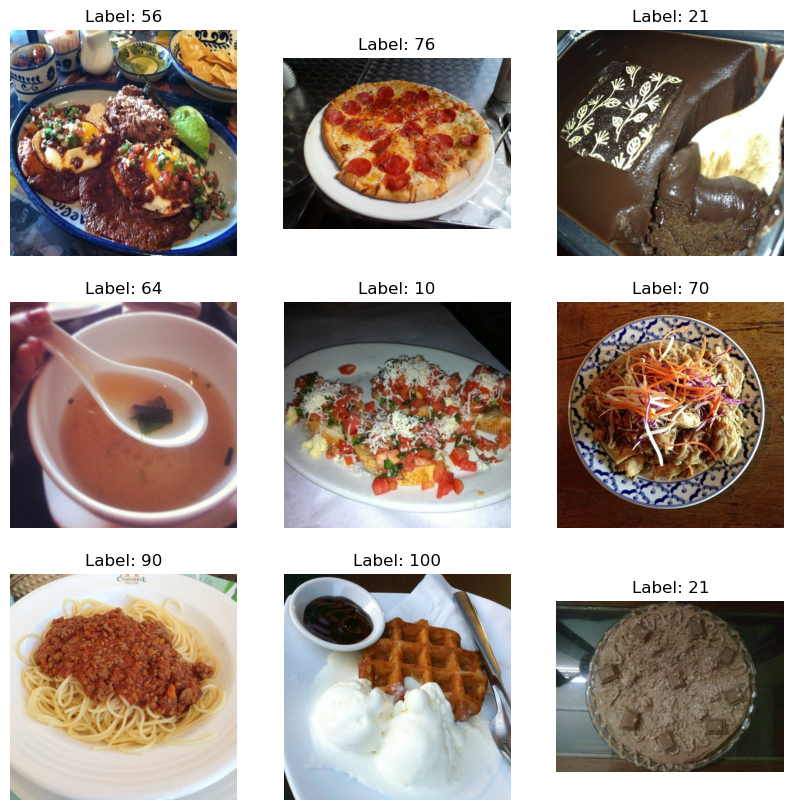

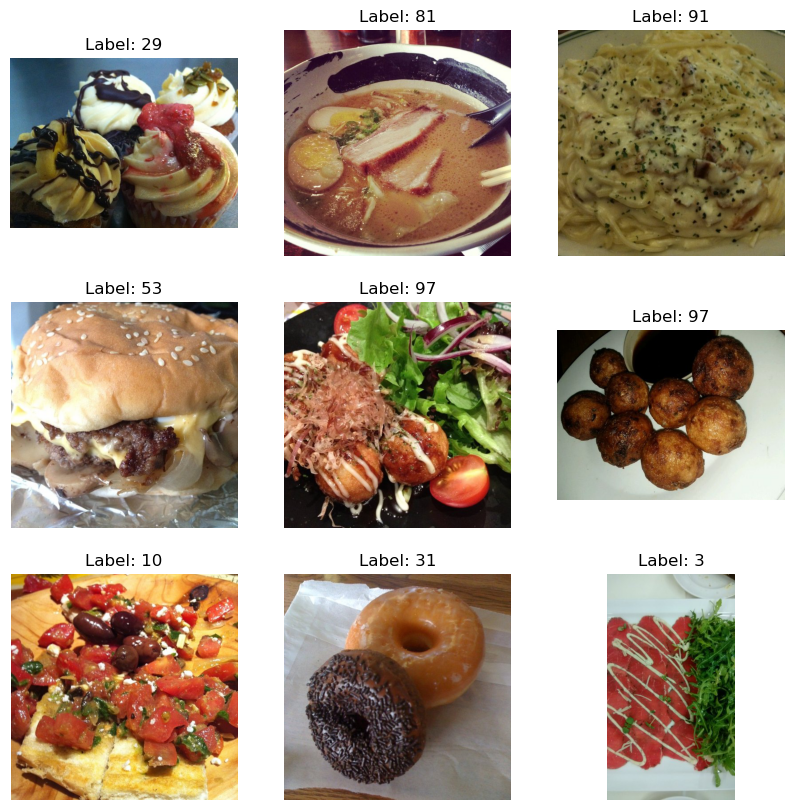

2025-01-16 20:05:39.964924: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


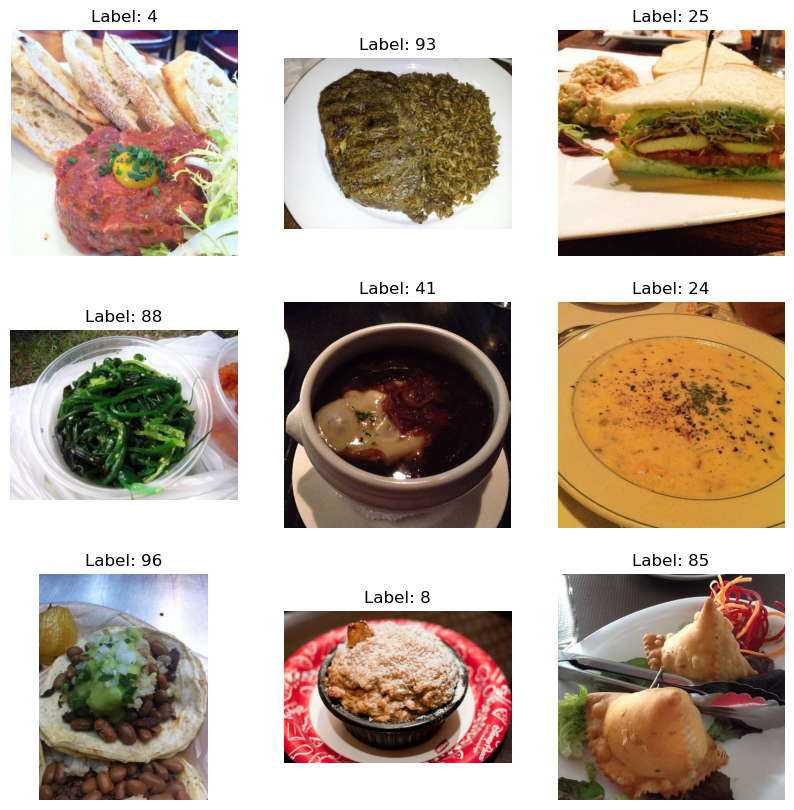

In [4]:
# Función para mostrar algunas imágenes
def plot_images(dataset, num_images=9):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(num_images)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image)
        plt.title(f"Label: {label.numpy()}")
        plt.axis("off")
    plt.show()

# Mostrar algunas imágenes del conjunto de entrenamiento
plot_images(train_dataset)

# Mostrar algunas imágenes del nuevo conjunto de validación
plot_images(val_dataset)

# Mostrar algunas imágenes del nuevo conjunto de prueba
plot_images(test_dataset)

In [5]:
# Función de preprocesamiento de imágenes
def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))  # Redimensionar las imágenes
    image = image / 255.0  # Normalizar las imágenes
    return image, label

# Aplicar el preprocesamiento a los datos de entrenamiento, validación y prueba
train_dataset = train_dataset.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Configurar el prefetching para mejorar el rendimiento
train_dataset = train_dataset.batch(32).prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.experimental.AUTOTUNE)

In [6]:
# Cargar el modelo base MobileNetV2 sin la capa final
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas del modelo base para no entrenarlas
base_model.trainable = False

# Añadir las capas adicionales
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(101, activation='softmax')(x)  # 101 clases de comida

# Crear el modelo final
model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10)

Epoch 1/10


I0000 00:00:1737054343.256445   14332 service.cc:146] XLA service 0x7f6a6c002520 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737054343.256482   14332 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
2025-01-16 20:05:43.330038: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-16 20:05:43.629618: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101
2025-01-16 20:05:44.218109: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1380', 4 bytes spill stores, 4 bytes spill loads

2025-01-16 20:05:44.312143: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory

  10/2368 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - accuracy: 0.0278 - loss: 4.9651  

I0000 00:00:1737054348.697920   14332 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2367/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3859 - loss: 2.5473

2025-01-16 20:06:19.239038: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1380', 8 bytes spill stores, 8 bytes spill loads

2025-01-16 20:06:19.401178: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1387', 268 bytes spill stores, 268 bytes spill loads

2025-01-16 20:06:19.735534: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1549', 144 bytes spill stores, 144 bytes spill loads

2025-01-16 20:06:19.885890: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1387', 12 bytes spill stores, 12 bytes spill loads

2025-01-16 20:06:19.923575: I external/local_xla/xla/strea

2368/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3860 - loss: 2.5471

2025-01-16 20:06:29.285500: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1169', 12 bytes spill stores, 12 bytes spill loads

2025-01-16 20:06:29.411096: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1169', 200 bytes spill stores, 200 bytes spill loads

2025-01-16 20:06:29.500624: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1176', 4 bytes spill stores, 4 bytes spill loads

2025-01-16 20:06:29.625784: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1176', 256 bytes spill stores, 256 bytes spill loads

2025-01-16 20:06:29.630745: I external/local_xla/xla/strea

2368/2368 ━━━━━━━━━━━━━━━━━━━━ 50s 18ms/step - accuracy: 0.3860 - loss: 2.5470 - val_accuracy: 0.5430 - val_loss: 1.7080
Epoch 2/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - accuracy: 0.5497 - loss: 1.7368 - val_accuracy: 0.5558 - val_loss: 1.6872
Epoch 3/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.6176 - loss: 1.4458 - val_accuracy: 0.5525 - val_loss: 1.7654
Epoch 4/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.6781 - loss: 1.1872 - val_accuracy: 0.5435 - val_loss: 1.8787
Epoch 5/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.7344 - loss: 0.9650 - val_accuracy: 0.5427 - val_loss: 2.0025
Epoch 6/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.7810 - loss: 0.7748 - val_accuracy: 0.5319 - val_loss: 2.2366
Epoch 7/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.8179 - loss: 0.6243 - val_accuracy: 0.5277 - val_loss: 2.4811
Epoch 8/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.8397 - loss: 0.52

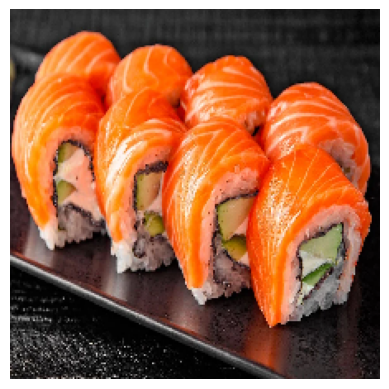

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicción de clase: sushi


In [10]:
# Ruta de la imagen
img_path = 'datos/sushi.jpg'

# Cargar la imagen
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))  # Redimensionar la imagen

# Convertir la imagen a un arreglo numpy
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Expande las dimensiones para que coincida con el formato (batch_size, height, width, channels)
img_array = np.expand_dims(img_array, axis=0)

# Normalizar la imagen (similar a lo que hicimos durante el preprocesamiento de entrenamiento)
img_array = img_array / 255.0

# Mostrar la imagen para verificar
plt.imshow(img)
plt.axis('off')
plt.show()

# Hacer la predicción
predictions = model.predict(img_array)

# Obtener la clase con la mayor probabilidad
predicted_class = np.argmax(predictions, axis=1)

# Mapeo de índices a etiquetas
labels = info.features['label'].int2str

# Decodificar la clase en etiqueta
predicted_label = labels(predicted_class[0])

# Imprimir la clase predicha
print(f"Predicción de clase: {predicted_label}")

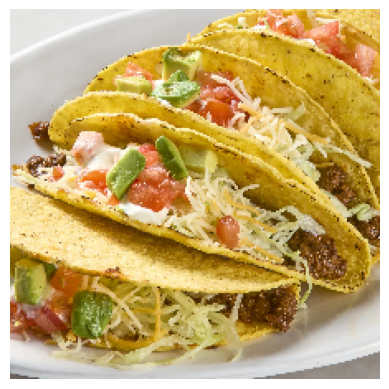

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicción de clase: tacos


In [11]:
# Ruta de la imagen
img_path = 'datos/tacos.jpeg'

# Cargar la imagen
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))  # Redimensionar la imagen

# Convertir la imagen a un arreglo numpy
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Expande las dimensiones para que coincida con el formato (batch_size, height, width, channels)
img_array = np.expand_dims(img_array, axis=0)

# Normalizar la imagen (similar a lo que hicimos durante el preprocesamiento de entrenamiento)
img_array = img_array / 255.0

# Mostrar la imagen para verificar
plt.imshow(img)
plt.axis('off')
plt.show()

# Hacer la predicción
predictions = model.predict(img_array)

# Obtener la clase con la mayor probabilidad
predicted_class = np.argmax(predictions, axis=1)

# Mapeo de índices a etiquetas
labels = info.features['label'].int2str

# Decodificar la clase en etiqueta
predicted_label = labels(predicted_class[0])

# Imprimir la clase predicha
print(f"Predicción de clase: {predicted_label}")

## EJERCICIO 4

Repite el ejercicio pero para otros datos (tienes conjuntos de datos en https://www.tensorflow.org/datasets/catalog/overview?hl=es-419 en el apartado image classificación, por ejemplo puedes usar stanford_dogs) y utilizando otra de las redes conocidas que no se haya utilizado todavía.
Para cargar los datos en este caso vas a descargar las imagnes a tu ordenador y cargarlos desde ahi (descargar la carpeta al ordenador y luego cargarlo desde la carpeta con python (mage_dataset_from_director)):

* Carga el conjunto de imagenes (entrenamiento, validación y pruebas)
* Explora los datos: dimensiones, número de elementos, dibuja algunas imagenes con sus etiquetas...
* Prepara los datos: añadir más elementos al conjunto de entrenamiento (rotando, trasladando... las imagenes acutales), cambiar el tamaño para que sea adecuado para el modelo, normalizar...
* Entrena un modelo para estos datos usando algunas de las redes ya existentes (por ejemplo: MobileNetV2)
* Busa una imagen en Internet y haz una predicción

## EJERCICIO 5

Sigue el tutorial de TensorFlow Style Transfer (https://homl.info/styletuto) hasta definir representaciones de contenido y estilo (hay que hacer sólo los primeros puntos, hasta el punto  Transferencia de estilo rápido usando TF-Hub (incluido)).

Haz algo parecido no igual (por lo menos cambia de imagenes).

Además tienes que poner comentarios para explicar con tus palabras lo que estas haciendo.

Realmente lo que esta haciendo es aplicar una capas convolucionales a una imagen, donde los filtros se han sacado de otra imagen.

## EJERCICIO 6

Crea un modelo sencillo que aplique un filtro personalizado a una imagen de contenido mediante una capa convolucional es un buen ejercicio para entender cómo funcionan las convoluciones en el procesamiento de imágenes.

Carga una imagen desde archivo preparala para se procesada por la red:
* Cargar la imagen (tf.keras.preprocessing.image.load_im)
* Convertir la imagen a un tensor de NumPy y redimensionarla:
    * tf.keras.preprocessing.image.img_to_array
    * tf.image.resize
* Añadir una dimensión de batch al tensor de la imagen (np.expand_dims)


Define un filtro personalizado para aplicar a la imagen. Los filtros son matrices pequeñas que modifican los píxeles de la imagen al aplicar la convolución.

Por ejemplo aquí tienes un filtro de bordes:

```python
filtro = np.array([
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
], dtype=np.float32)
```
El filtro debe tener forma (altura, anchura, canales_entrada, canales_salida) (usa reshape)

Crea un modelo secuencial en Keras con una única capa convolucional que utilice tu filtro personalizado.

Visualiza el resultado (muestra la imagen original y la imagen con el filtro y pon un título a cada imagen)

## EJERCICIO 7
Repite el ejercicio anterior con diferentes modelos y filtros:
* Prueba otro filtro (mostrar imagen original e imagen con filtro)
* Prueba con tres filtros a la vez (mostrar la imagen resultante de cada filtro)
* Prueba con tres filtros y dos capas convolucionales (mostrar imagen original e imagne con filtro)